<a href="https://colab.research.google.com/github/shahroz-dev/Machine-Learning-Based-Real-Estate-Price-Prediction/blob/main/Machine_Learning_Based_Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from sklearn.impute import SimpleImputer

### Extract Data

In [2]:
!wget https://github.com/shahroz-dev/Machine-Learning-Based-Real-Estate-Price-Prediction/raw/main/Data.zip
zip_ref = zipfile.ZipFile("Data.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-10 14:52:42--  https://github.com/shahroz-dev/Machine-Learning-Based-Real-Estate-Price-Prediction/raw/main/Data.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shahroz-dev/Machine-Learning-Based-Real-Estate-Price-Prediction/main/Data.zip [following]
--2022-08-10 14:52:43--  https://raw.githubusercontent.com/shahroz-dev/Machine-Learning-Based-Real-Estate-Price-Prediction/main/Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190803 (186K) [application/zip]
Saving to: ‘Data.zip’

Data.zip            100%[===================>] 186.33K  --.-KB/s    in 0.02s   

2022-08-10 14

### Data Read and Exploration

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
# Look for types of areas
df1.groupby('area_type').agg({'area_type':'count'})

,area_type
area_type,
Built-up Area,2418
Carpet Area,87
Plot Area,2025
Super built-up Area,8790


In [6]:
# It is observed that some features didn't affect our house prices which needs to be removed from our dataset
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
# Check for missing values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# Select numerical and object columns list for filling NaNs
numerical_columns = df2.select_dtypes(include=['float64']).columns.tolist()
object_columns = df2.select_dtypes(include=['object']).columns.tolist()
numerical_columns, object_columns

(['bath', 'price'], ['location', 'size', 'total_sqft'])

In [9]:
# Select suitable imputer for filling NaNs for both numerical and object columns
numerical_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
object_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')

df2[numerical_columns] = numerical_imputer.fit_transform(df2[numerical_columns])
df2[object_columns] = object_imputer.fit_transform(df2[object_columns])

In [10]:
# Again check for missing values
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
# the size column needs to be transform numerically into a new feature 'bhk'
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
# Let's Explore total_sqft data
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [14]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


**Note:** There are some ranges and string form data in total_sqft which needs to be transformed

In [15]:
def convert_sqft_to_num(x):
  token = x.split('-')
  if (token == 2):
    return (float(token[0]) + float(token[1]))/2
  try:
    return float(x)
  except:
    return None

In [16]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

### Feature Engineering

In [17]:
# We can add a feature using two features price and total_sqft which can help us as well to remove the outliers
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [18]:
# Let's check the location feature
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [19]:
location_stats = df4.groupby(['location'])['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             541
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

**Note:** The location feature has too many unique values. While converting this into one-hot-encoding using dummy variables which results in too many features. This needs to be transformed

In [20]:
location_stats_less_than_10 = location_stats[location_stats < 10]
len(location_stats_less_than_10), len(location_stats)

(1052, 1305)

**Note:** There are 1052 locations out of 1305 locations which have values less than. We can assign all these less than 10 location values as other location

In [21]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4['location'].unique())

254

In [22]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


**Note:** There is need to examine the dataset to check if some data is wrongly input. It is unusual if the size of a bedroom is less than 300. 

In [23]:
df4[df4['total_sqft']/df4['bhk'] < 300].shape

(744, 7)

**Note:** These are called outliers which needs to be filtered

In [24]:
df5 = df4[~(df4['total_sqft']/df4['bhk'] < 300)]
df5.shape

(12576, 7)

In [25]:
df5['price_per_sqft'].describe()

count     12329.000000
mean       6322.476758
std        4187.479096
min         267.829813
25%        4207.119741
50%        5300.000000
75%        6938.483548
max      176470.588235
Name: price_per_sqft, dtype: float64

**Note:** The minimum and maximum prices shows that it is unusual to have price_per_sqft which these prices. These are outliers as well and we need to filter out these as well

In [26]:
# Let's create a function which filter all the values in each location if it is outside of their standard deviation values around their mean

def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf['price_per_sqft'])
    std = np.std(subdf['price_per_sqft'])
    reduced_df = subdf[(subdf['price_per_sqft'] > (m-std)) & (subdf['price_per_sqft'] <= (m+std))]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out

In [27]:
df6 = remove_pps_outliers(df5)
df6.shape

(10138, 7)

In [28]:
def plot_scatter_chart(df, location):
  bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
  bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
  plt.figure(figsize=(10, 5))
  plt.scatter(bhk2['total_sqft'], bhk2['price_per_sqft'], color = 'blue', label = '2 bhk', s = 50)
  plt.scatter(bhk3['total_sqft'], bhk3['price_per_sqft'], marker = '+', color = 'green', label = '3 bhk', s = 50)
  plt.xlabel('Total Sq. Feet Area')
  plt.ylabel('Price Per Sq. Feet')
  plt.title(location)
  plt.legend()

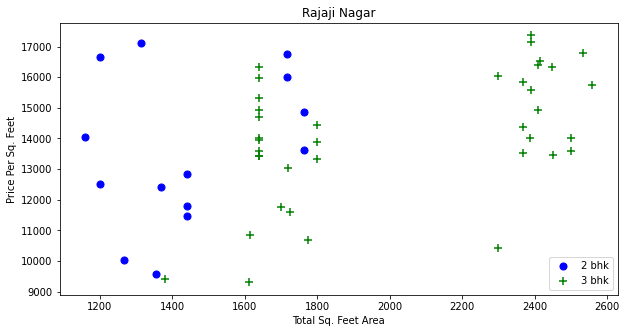

In [29]:
plot_scatter_chart(df6, "Rajaji Nagar")

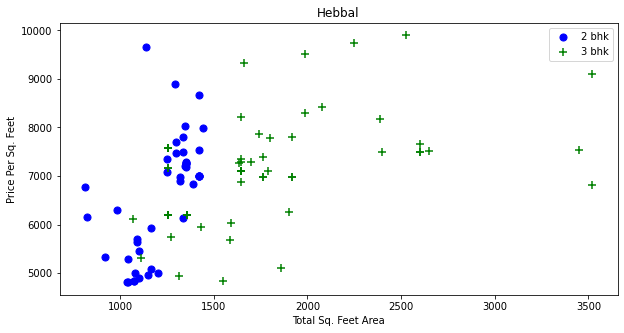

In [30]:
plot_scatter_chart(df6, "Hebbal")

**Note:** It is observed that some 2 bhk points are greater than the 3 bhk points which are considered as outliers and need to be transformed

In [31]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(7280, 7)

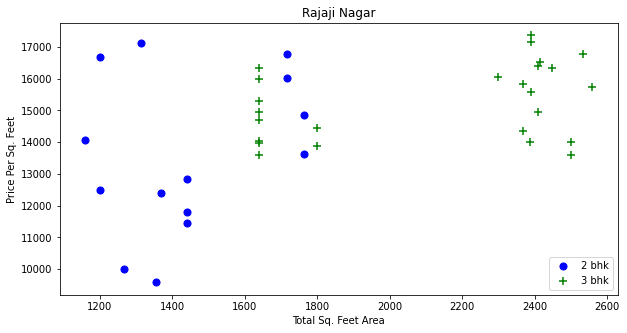

In [32]:
plot_scatter_chart(df7, "Rajaji Nagar")

In [33]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2,4540.654699


In [34]:
# remove the size and price_per_sqft features from the dataframe
df8 = df7.drop(['size', 'price_per_sqft'], axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2


In [35]:
# Get dummy variables for locaation category feature
dummies = pd.get_dummies(df8['location'])
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df9 = pd.concat([df8, dummies.drop('other', axis='columns')], axis='columns') # other location is drop
df9.shape

(7280, 258)

In [37]:
df10 = df9.drop('location', axis='columns')
df10.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X = df10.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y = df10['price']
y.shape

(7280,)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8256152490224492

In [42]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=42)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82561525, 0.84218821, 0.85268988, 0.86481839, 0.8600274 ])

In [43]:
def predict_price(location, sqft, bath, bhk):
  loc_index = np.where(X.columns == location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if (loc_index >= 0):
    x[loc_index] = 1
  return lr_clf.predict([x])[0]

In [44]:
predict_price("1st Phase JP Nagar", 1000, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


86.26308337865844

In [45]:
predict_price("1st Phase JP Nagar", 1000, 3, 3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


84.99172719996285

In [46]:
predict_price("Indira Nagar", 1000, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


173.09807232718043

In [47]:
import pickle
with open('real_estate_prices_model.pickle', 'wb') as f:
  pickle.dump(lr_clf, f) 

In [48]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", 'w') as f:
  json.dump(columns, f)